Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Define input data (X) and target values (Y)

In [2]:
X = np.array([0.5, 2.5])  # Feature values (independent variable)
Y = np.array([0.2, 0.9])  # Corresponding target values (dependent variable)

Define the sigmoid activation function

    Sigmoid function:
    f(w, b, x) = 1 / (1 + exp(-(w*x + b)))
    
    Parameters:
    w : Weight parameter
    b : Bias parameter
    x : Input feature

    Returns:
    Sigmoid output for the given x

In [3]:
def f(w, b, x):

    return 1.0 / (1.0 + np.exp(-(w * x + b)))

Define the Mean Squared Error (MSE) loss function

    Mean Squared Error (MSE) function:
    E(w, b) = (1/2) * Σ (f(w, b, x) - y)^2
    
    Parameters:
    w : Weight parameter
    b : Bias parameter

    Returns:
    Computed error for given w and b


In [4]:
def error(w, b):

    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

Compute gradient of error function w.r.t bias (b)

    Gradient of error function w.r.t bias:
    ∂E/∂b = (f(w, b, x) - y) * f(w, b, x) * (1 - f(w, b, x))
    
    Parameters:
    w, b : Weight and bias parameters
    x, y : Feature and target values

    Returns:
    Partial derivative of error w.r.t bias
  

In [5]:
def grad_b(w, b, x, y):

    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

Compute gradient of error function w.r.t weight (w)

    Gradient of error function w.r.t weight:
    ∂E/∂w = (f(w, b, x) - y) * f(w, b, x) * (1 - f(w, b, x)) * x
    
    Parameters:
    w, b : Weight and bias parameters
    x, y : Feature and target values

    Returns:
    Partial derivative of error w.r.t weight

In [7]:
def grad_w(w, b, x, y):

    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

Perform standard gradient descent optimization

    Standard Gradient Descent Algorithm:
    w = w - η * (∂E/∂w)
    b = b - η * (∂E/∂b)

    Returns:
    w_vals, b_vals, err_vals : Lists of weight, bias, and error values at each iteration

In [8]:
def do_gradient_descent():

    w, b = -2, -2  # Initialize weight and bias
    eta = 1.0  # Learning rate
    max_epochs = 1000  # Number of iterations

    w_vals, b_vals, err_vals = [], [], []

    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        w = w - eta * dw  # Update weight
        b = b - eta * db  # Update bias

        w_vals.append(w)
        b_vals.append(b)
        err_vals.append(error(w, b))

    return w_vals, b_vals, err_vals

Perform gradient descent with momentum


    Momentum-based Gradient Descent Algorithm:
    
    v_w = γ * prev_v_w + η * ∂E/∂w
    v_b = γ * prev_v_b + η * ∂E/∂b
    w = w - v_w
    b = b - v_b

    Returns:
    w_vals, b_vals, err_vals : Lists of weight, bias, and error values at each iteration


In [9]:
def do_momentum_gradient_descent():

    w, b = -2, -2  # Initialize weight and bias
    eta = 1.0  # Learning rate
    gamma = 0.9  # Momentum factor
    max_epochs = 1000  # Number of iterations

    prev_v_w, prev_v_b = 0, 0  # Initialize velocity terms

    w_vals, b_vals, err_vals = [], [], []

    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        # Update velocity terms
        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        # Update weights using momentum
        w = w - v_w
        b = b - v_b

        prev_v_w = v_w  # Store previous velocity
        prev_v_b = v_b  # Store previous velocity

        w_vals.append(w)
        b_vals.append(b)
        err_vals.append(error(w, b))

    return w_vals, b_vals, err_vals

Perform Nesterov Accelerated Gradient Descent


    Nesterov Accelerated Gradient Descent Algorithm:
    
    v_w = γ * prev_v_w
    v_b = γ * prev_v_b
    w = w - v_w
    b = b - v_b
    # Now calculate gradients after partial update
    dw = grad_w(w - v_w, b - v_b, x, y)
    db = grad_b(w - v_w, b - v_b, x, y)
    w = w - v_w
    b = b - v_b

    Returns:
    w_vals, b_vals, err_vals : Lists of weight, bias, and error values at each iteration

In [10]:
def do_nesterov_accelerated_gradient_descent():

    w, b = -2, -2  # Initialize weight and bias
    eta = 1.0  # Learning rate
    gamma = 0.9  # Momentum factor
    max_epochs = 1000  # Number of iterations

    prev_v_w, prev_v_b = 0, 0  # Initialize velocity terms

    w_vals, b_vals, err_vals = [], [], []

    for i in range(max_epochs):
        dw, db = 0, 0
        # First perform partial updates using momentum
        v_w = gamma * prev_v_w
        v_b = gamma * prev_v_b

        # Now calculate gradients after partial update
        for x, y in zip(X, Y):
            dw += grad_w(w - v_w, b - v_b, x, y)
            db += grad_b(w - v_w, b - v_b, x, y)

        # Perform the full update
        v_w = gamma * prev_v_w + eta * dw
        v_b = gamma * prev_v_b + eta * db

        # Update weight and bias using full update
        w = w - v_w
        b = b - v_b

        prev_v_w = v_w  # Store previous velocity
        prev_v_b = v_b  # Store previous velocity

        w_vals.append(w)
        b_vals.append(b)
        err_vals.append(error(w, b))

    return w_vals, b_vals, err_vals

Generate weight and bias ranges for error surface visualization

In [11]:
w_range = np.linspace(-3, 3, 50)
b_range = np.linspace(-3, 3, 50)
W, B = np.meshgrid(w_range, b_range)

Compute error surface for visualization

In [12]:
Error_surface = np.array([[error(w, b) for w in w_range] for b in b_range])

Perform all three methods and store values

In [13]:
w_vals_gd, b_vals_gd, err_vals_gd = do_gradient_descent()
w_vals_mgd, b_vals_mgd, err_vals_mgd = do_momentum_gradient_descent()
w_vals_nagd, b_vals_nagd, err_vals_nagd = do_nesterov_accelerated_gradient_descent()

Plot 3D error surface and compare paths of all three gradient descents

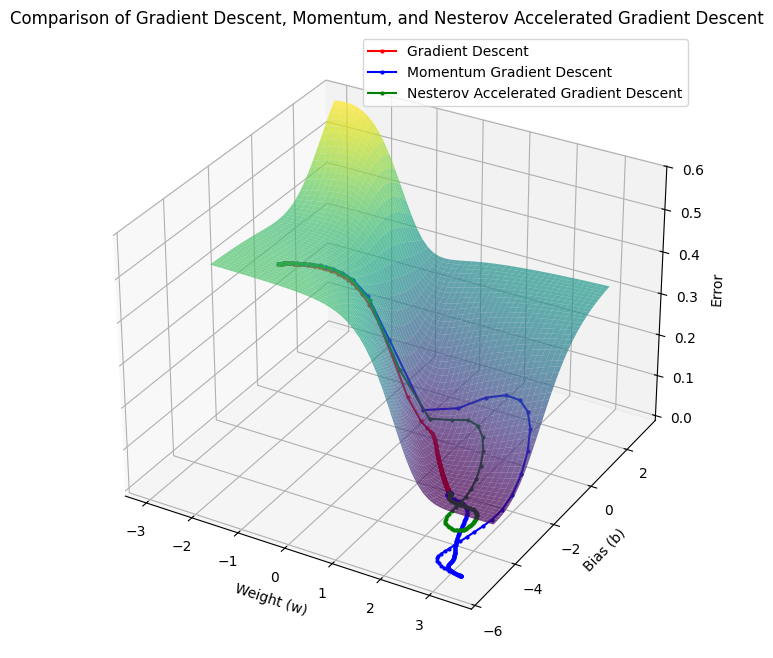

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the error surface
ax.plot_surface(W, B, Error_surface, cmap='viridis', alpha=0.7)

# Plot standard gradient descent path
ax.plot(w_vals_gd, b_vals_gd, err_vals_gd, color='r', marker='o', markersize=2, label="Gradient Descent")

# Plot momentum-based gradient descent path
ax.plot(w_vals_mgd, b_vals_mgd, err_vals_mgd, color='b', marker='o', markersize=2, label="Momentum Gradient Descent")

# Plot Nesterov Accelerated Gradient Descent path
ax.plot(w_vals_nagd, b_vals_nagd, err_vals_nagd, color='g', marker='o', markersize=2, label="Nesterov Accelerated Gradient Descent")

# Set axis labels and title
ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Error")
ax.set_title("Comparison of Gradient Descent, Momentum, and Nesterov Accelerated Gradient Descent")
ax.legend()

# Show the plot
plt.show()